In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
with open ('review_sentiment_score_updated.csv', 'r') as review:
    df = pd.read_csv(review, index_col='index')
    df = df.drop(['Unnamed: 0'], axis=1)

In [36]:
import matplotlib.pyplot as plt

In [38]:
for i in range(len(df)):
    df.loc[i,'avg_sentiment'] = df.iloc[i,3:9].mean()

In [39]:
for i in range(len(df.index)):
    sentiment = df.loc[i,'avg_sentiment']
    rate = df.loc[i,'rate']
    if sentiment < 0.25 and rate >5:
        df.loc[i, 'classes'] = 1
    
    else:
        df.loc[i, 'classes'] = 0

df_no_outlier = df[df.classes == 0]

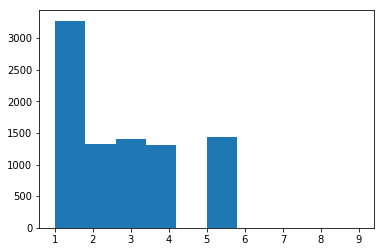

In [41]:
plt.hist(df_no_outlier.rate)
plt.show()
# i will for sure get more data from other set.

In [42]:
for i in range(len(df.index)):
    rate = df.loc[i,'rate']
    # movie_class:
    # 1: poor
    # 2: below average
    # 3: average
    # 4: above average
    # 5: excellent
    if rate == 1 or rate == 2:
        df.loc[i, 'movie_class'] = 1
    elif rate == 3 or rate == 4:
        df.loc[i, 'movie_class'] = 2
    elif rate == 5 or rate == 6:
        df.loc[i, 'movie_class'] = 3
    elif rate == 7 or rate == 8:
        df.loc[i, 'movie_class'] = 4
    elif rate == 9 or rate == 10:
        df.loc[i, 'movie_class'] = 5

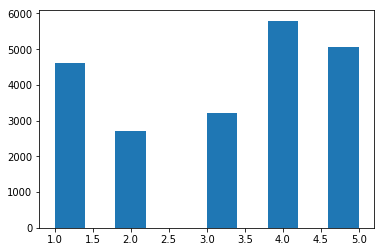

In [43]:
plt.hist(df.movie_class)
plt.show()

In [26]:
# trying different method
#df1 = df[df['movie_class']!= 1]

In [27]:
training, test = train_test_split(df, test_size=0.2, random_state=233)
print(len(training), "train +", len(test), "test")

17094 train + 4274 test


In [28]:
x = training[['vader_pos', 'vader_neg','senticnet_pos', 'senticnet_neg', 'pattern_pos', 'pattern_neg']]
y = training.rate

In [29]:
x_test = test[['vader_pos', 'vader_neg','senticnet_pos', 'senticnet_neg', 'pattern_pos', 'pattern_neg']]
y_test = test.rate

In [35]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression(solver='saga', multi_class='multinomial', random_state=20, max_iter=1000)
# the attribute of the function (default parameters)
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=20, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
lr.score(x_test, y_test)

0.5969760166840459

In [44]:
from sklearn.metrics import confusion_matrix

In [51]:
conf_matrix = confusion_matrix(y_test, lr.predict(x_test), labels=[1,2,3,4,5])
conf_matrix

array([[1107,    0,    0,    0,    0],
       [ 188,    0,    0,    0,    0],
       [ 106,    0,    0,    0,    0],
       [  67,    0,    0,    0,    0],
       [  58,    0,    0,    0,    0]])

In [46]:
from sklearn.model_selection import cross_validate

In [47]:
scores = cross_validate(lr, x, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.12030482, 0.12589192, 0.0973711 , 0.08365583, 0.0988543 ,
        0.08905983, 0.09263921, 0.09075689, 0.097193  , 0.09667826]),
 'score_time': array([0.00079632, 0.00050616, 0.00051689, 0.0005281 , 0.00050378,
        0.00050926, 0.00049877, 0.00097394, 0.00050116, 0.00094795]),
 'test_accuracy': array([0.60492228, 0.58571429, 0.60677083, 0.58723958, 0.59895833,
        0.60052219, 0.60392157, 0.59607843, 0.59607843, 0.61074705]),
 'train_accuracy': array([0.59915918, 0.60086957, 0.59794263, 0.59982614, 0.5992466 ,
        0.59921784, 0.59971035, 0.59971035, 0.59942071, 0.59794411])}

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
scores = cross_validate(clf, x, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.05302596, 0.04719687, 0.04608488, 0.03985381, 0.03909397,
        0.04333997, 0.03939891, 0.04056931, 0.03880382, 0.04409385]),
 'score_time': array([0.00592017, 0.00187325, 0.00187421, 0.00185418, 0.00188589,
        0.00184202, 0.00185299, 0.00184274, 0.00186014, 0.00194693]),
 'test_accuracy': array([0.58549223, 0.58831169, 0.58723958, 0.58854167, 0.58723958,
        0.58877285, 0.59346405, 0.5869281 , 0.59084967, 0.5897772 ]),
 'train_accuracy': array([0.59031603, 0.59014493, 0.58794552, 0.59185743, 0.58852507,
        0.5877752 , 0.59116582, 0.591021  , 0.5897176 , 0.58766469])}